# Image Compression with Wavelet Transform

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pywt
from skimage import io
from matplotlib.image import imread
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 12})

## Read the Image

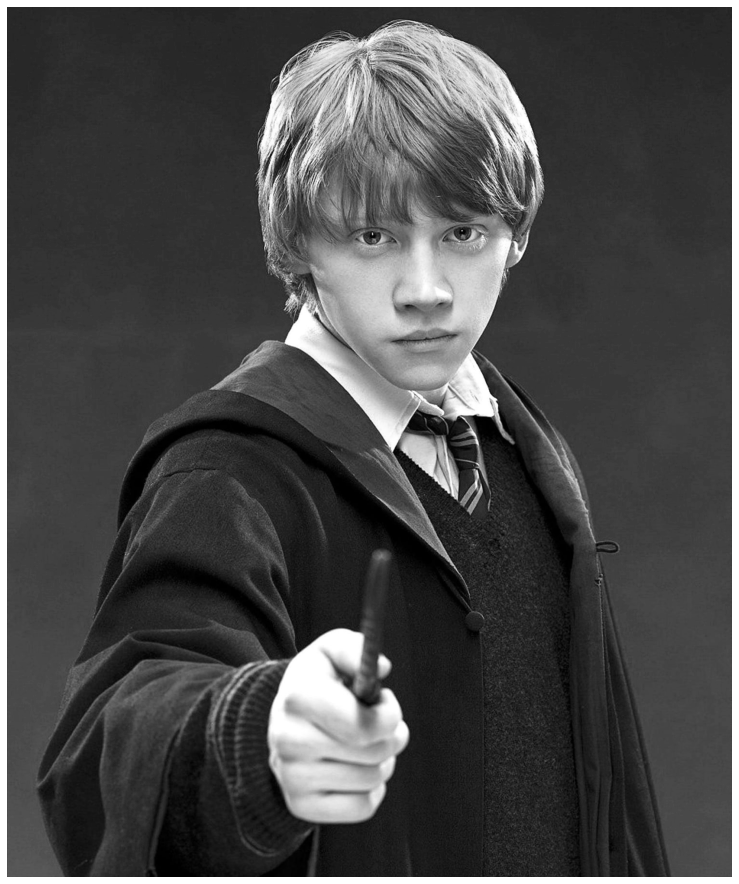

In [2]:
url = 'https://media.harrypotterfanzone.com/ron-weasley-order-of-the-phoenix-portrait.jpg'

A = io.imread(url)    # read the .jpg file into an numpy array
B = np.mean(A, -1)    # Convert RGB to grayscale

img = plt.imshow(B, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
B.shape

(1800, 1500)

## Wavelet Decomposition (2 Levels)

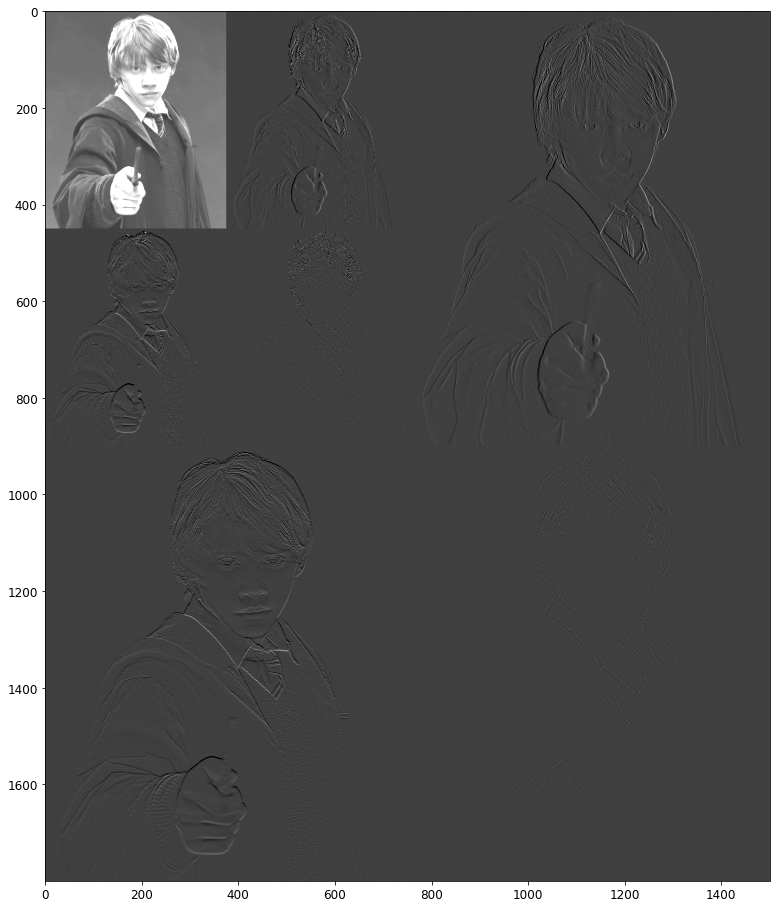

In [4]:
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

# Image compression with 4 levels

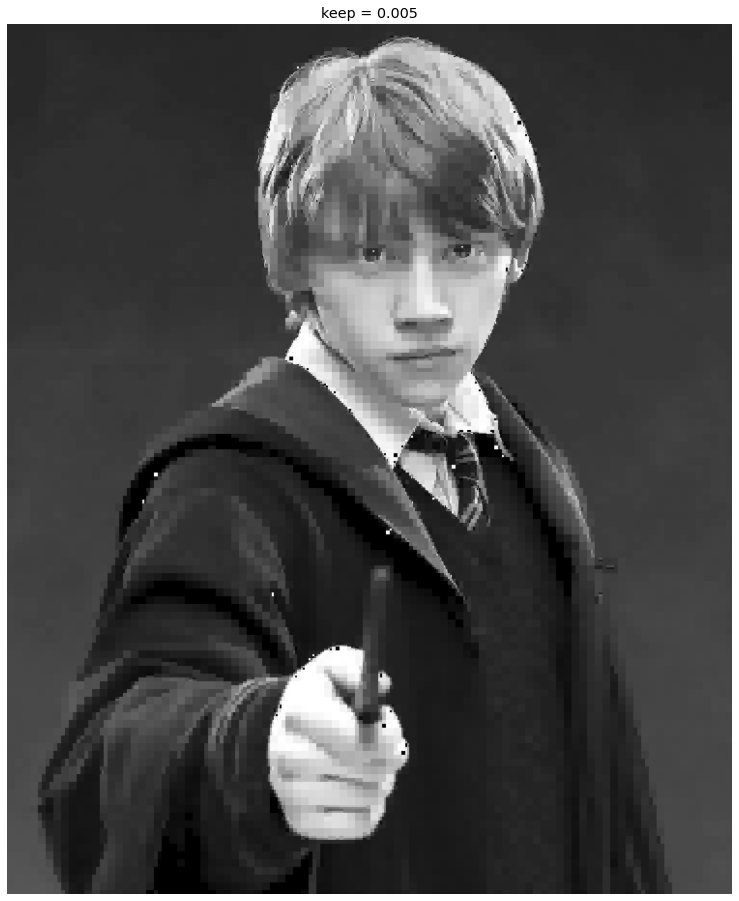

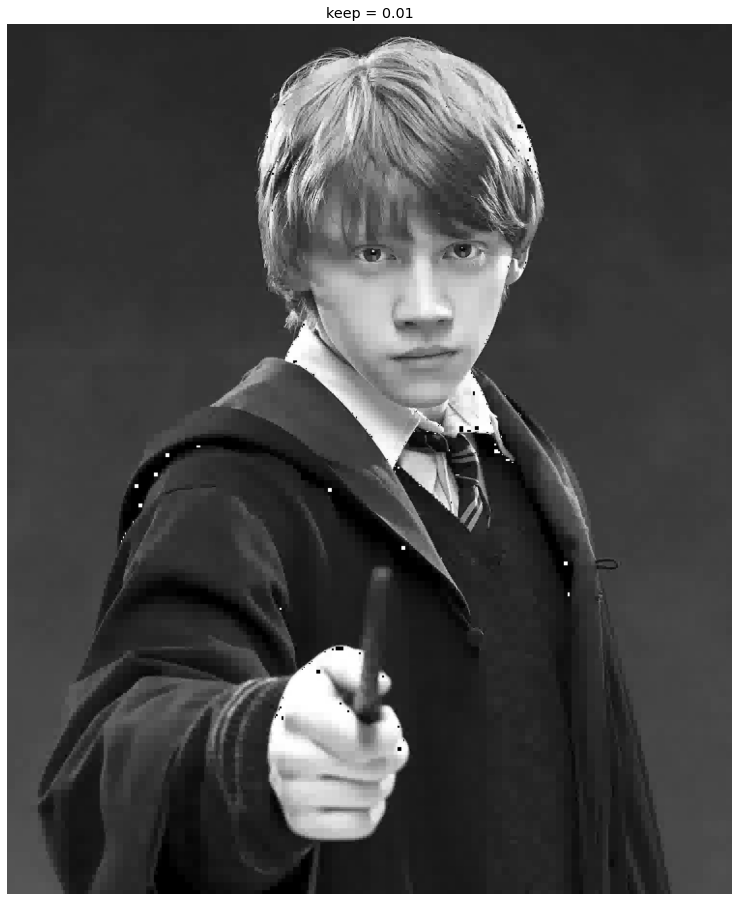

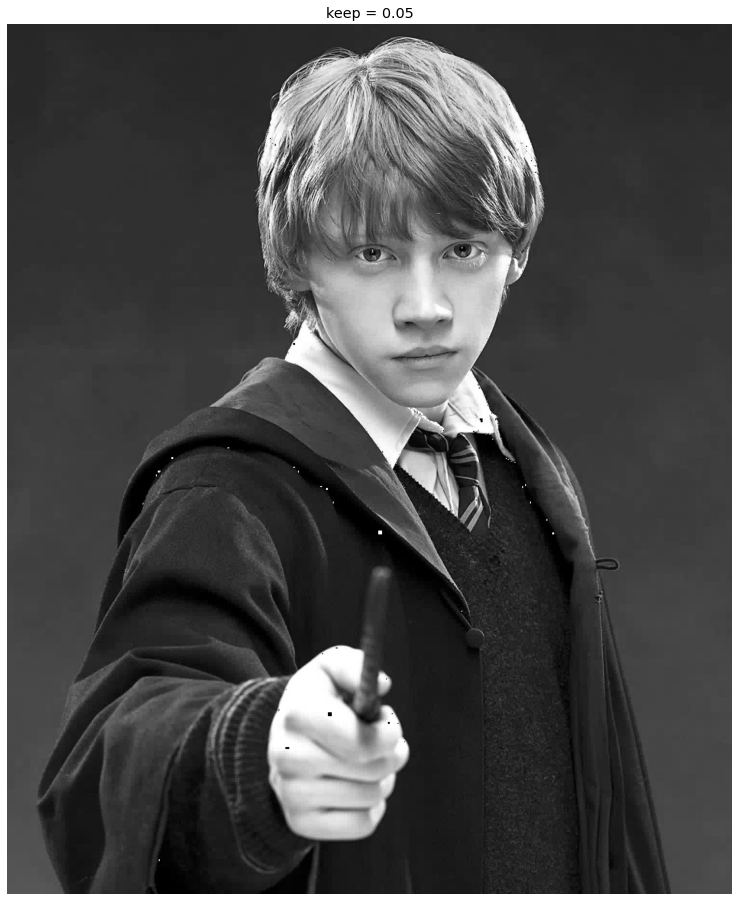

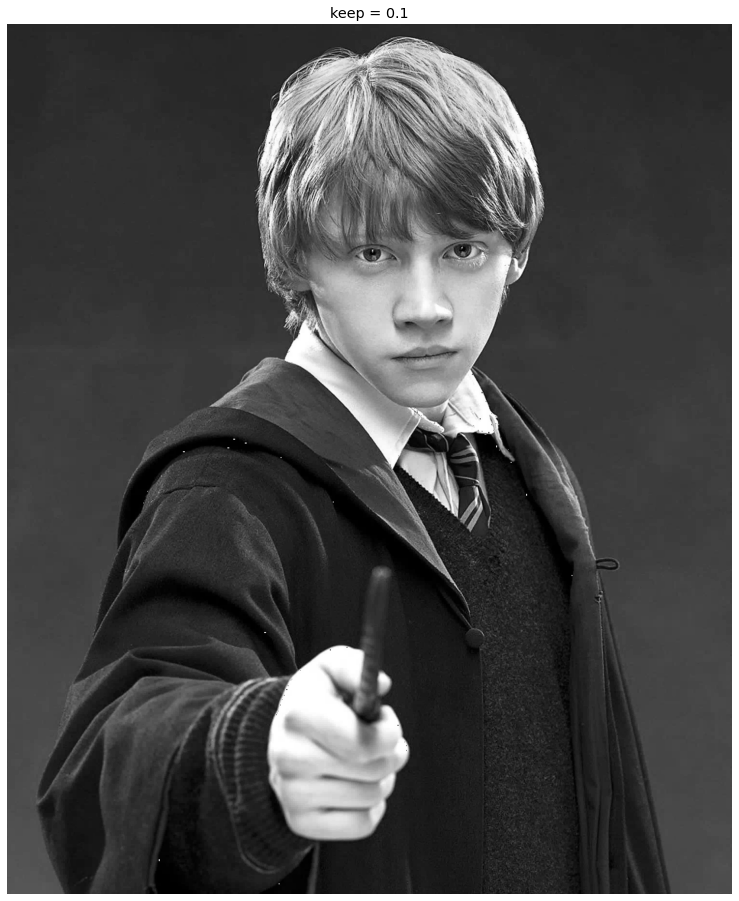

In [5]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.005, 0.01, 0.05, 0.1):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))

## References

This exercise and code reference the lecture given by Prof. Steven Brunton (Department of Mechanical Engineering, University of Washington)

https://youtu.be/eJLF9HeZA8I?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC

More details on Fourier Analysis can be found on: 

My notes: https://github.com/derekl-beep/cs-notes

Books: Chapter 2 of Data-driven Science and Engineering - Machine Learning, Dynamical Systems and Control.
Authur(s): Steven L. Brunton, J. Nathan Kutz.